In [14]:
# Tensorflow :

import tensorflow as tf 

print(tf.__version__)

2.8.0


In [16]:
# Load dataset :

from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [18]:
# shape of dataset :

print("x_train shape :", x_train.shape)
print()
print("y_train shape :", y_train.shape)
print()
print("x_test shape :", x_test.shape)
print()
print("y_test shape :", y_test.shape)

x_train shape : (60000, 28, 28)

y_train shape : (60000,)

x_test shape : (10000, 28, 28)

y_test shape : (10000,)


In [22]:
# image du handwritting digit ---> neural network ---> digit class {0,,,,9}

In [23]:
# display labels : 

labels = set(y_train)

In [24]:
print(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


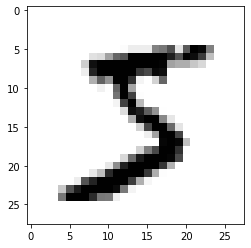

In [25]:
# display images : 

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="binary")
plt.show()

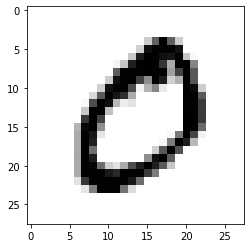

In [26]:
plt.imshow(x_train[1], cmap="binary")
plt.show()

In [27]:
# one hot encoding : 

# 0 --> {1,0,0,0,0,0,0,0,0,0}

# 1 --> {0,1,0,0,0,0,0,0,0,0}

from tensorflow.keras.utils import to_categorical 

y_train_encoded = to_categorical(y_train)

x_train_encoded = to_categorical(x_train)

y_test_encoded = to_categorical(y_test)

x_test_encoded = to_categorical(x_test)

In [28]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_train_encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
# Neural network :

28*28

784

In [33]:
# transform N-dimensional arrays into vectors : 
# (60000, 28, 28) ---> (60000, 784)

import numpy as np 


x_train_reshape = np.reshape(x_train, (60000, 784))

x_test_reshape = np.reshape(x_test, (10000, 784))

In [35]:
x_train_reshape.shape

(60000, 784)

In [36]:
x_test_reshape.shape

(10000, 784)

In [39]:
x_test_reshape[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [40]:
x_test_reshape[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [43]:
# data normalization : 

x_mean = np.mean(x_train_reshape)

x_std = np.std(x_train_reshape)

eps = 1e-10

x_train_norm = (x_train_reshape - x_mean)/(x_std + eps)

In [50]:
x_test_norm = (x_test_reshape - x_mean)/(x_std + eps)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

#ReLU est une fonction d’activation très couramment utilisée. Acronyme de Rectified Linear Unit (unité linéaire rectifiée), elle permet tout simplement de remplacer les résultats négatifs par zéro.

#Elle peut s’exprimer mathématiquement de la façon suivante :

#f(x) = max(0,x)

#Ou d’un point de vue algorithmique de la façon suivante :

#fonction relu(x)

#si x >0 retourne x sinon retourne 0

#fin fonction

In [58]:
model = Sequential([
    Dense(128, activation='relu', input_shape = (784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

2022-11-03 01:38:56.954525: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
# compiling the model :

model.compile (
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [60]:
# training the model : 

model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3769 - accuracy: 0.8898
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1859 - accuracy: 0.9460
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1412 - accuracy: 0.9589


In [61]:
# evaluate the model :

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 1s 923us/step - loss: 0.1300 - accuracy: 0.9613


In [62]:
print("Test set accuracy :", accuracy * 100)

Test set accuracy : 96.13000154495239
